**MiniSOM** provides a simple and lightweight implementation of the SOM algorithm, making it a useful tool for tasks such as dimensionality reduction, clustering, and visualization of high-dimensional data.

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=6ee69420ae9cd615eb893cfe8a30ce3a29f124d0e693d9174b8a68a42f3f1c5a
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from minisom import MiniSom
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# **Reading and Exploring the data**

In [3]:
train_data = pd.read_csv('/content/Mall_Customers.csv')
train_data = train_data.drop('CustomerID', axis=1)

train_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Annual Income (k$)']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Annual Income (k$)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Annual Income (k$)']
  ys = series['Spending Score (1-100)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Annual Income (k$)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Spending Score (1-100)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Annual Income (k$)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Annual Income (k$)'}, axis=1)
              .sort_values('Annual Income (k$)', ascending=True))
  xs = counted['Annual Income (k$)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Annual Income (k$)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Annual Income (k$)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

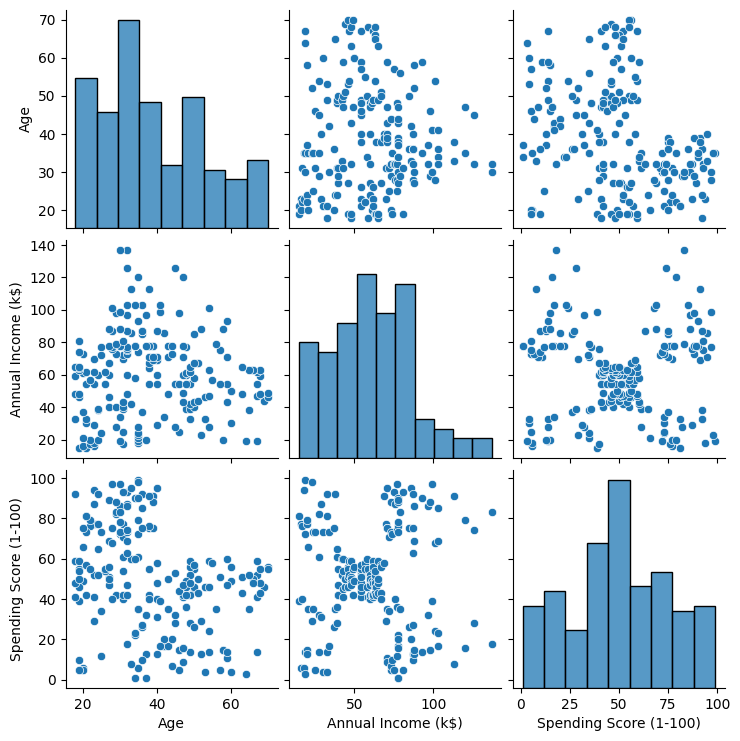

In [4]:
# Visualize the data
sns.pairplot(train_data)
plt.show()

In [5]:
# Check for null values
null_values = train_data.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Check for duplicates
duplicates = train_data.duplicated().sum()
print("\nNumber of duplicated rows in the dataset:", duplicates)


Number of duplicated rows in the dataset: 0


In [7]:
print('train_data rows: ',train_data.shape[0])
print('train_data columns: ',train_data.shape[1])

train_data rows:  200
train_data columns:  4


In [8]:
print("Data Types:")
print(train_data.dtypes)

Data Types:
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


**Pie**

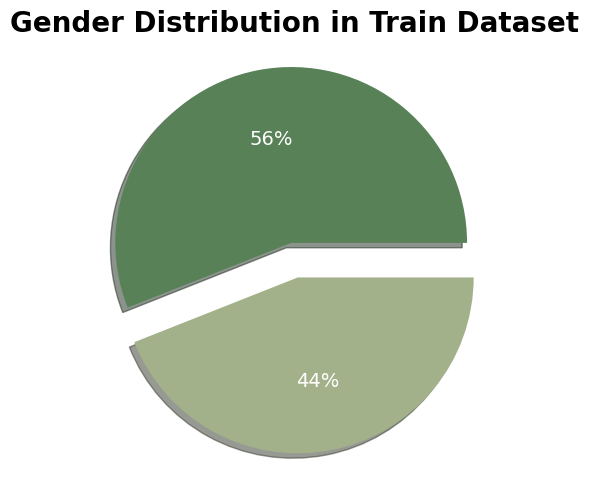

In [9]:
import matplotlib.pyplot as plt

colors = ['#588157', '#a3b18a']  # Dark green and olive green
gender_counts = train_data['Gender'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    gender_counts,
    labels=gender_counts.index,
    shadow=True,
    explode=[.1 for i in range(gender_counts.nunique())],  # Adjust the explode based on the number of unique values
    autopct='%1.f%%',
    colors=colors,  # Specify the colors here
    textprops={'size': 14, 'color': 'white'}
)

ax.set_title('Gender Distribution in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

**Heatmap**

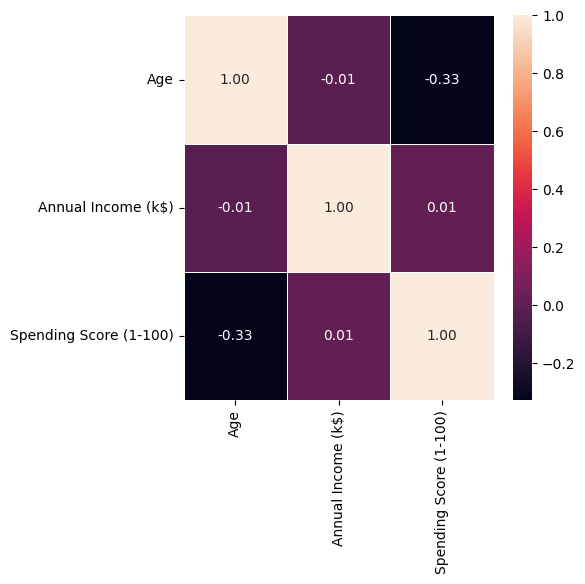

In [10]:
selected_features = [
    'Age','Annual Income (k$)','Spending Score (1-100)'
]

subset_correlation_matrix = train_data[selected_features].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(
    subset_correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=.5
)

plt.show()

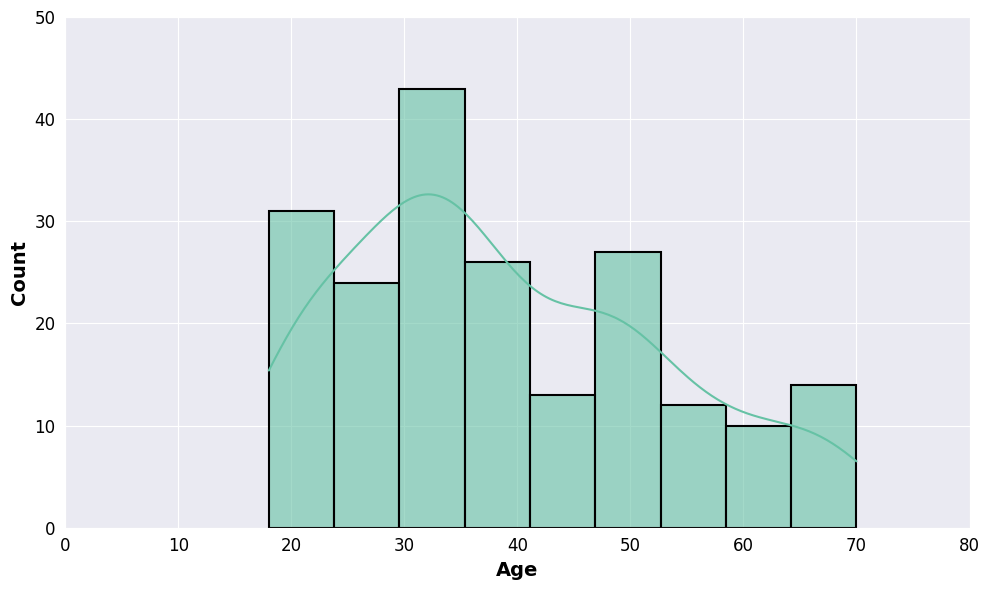

In [11]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

columns_to_plot = ['Age']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_data, x=column, multiple="stack", kde=True, alpha=0.6, linewidth=1.5, edgecolor='black')
    plt.xlabel('Age', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    plt.xlim(0, 80)
    plt.ylim(0, 50)
    plt.tight_layout()
    plt.show()

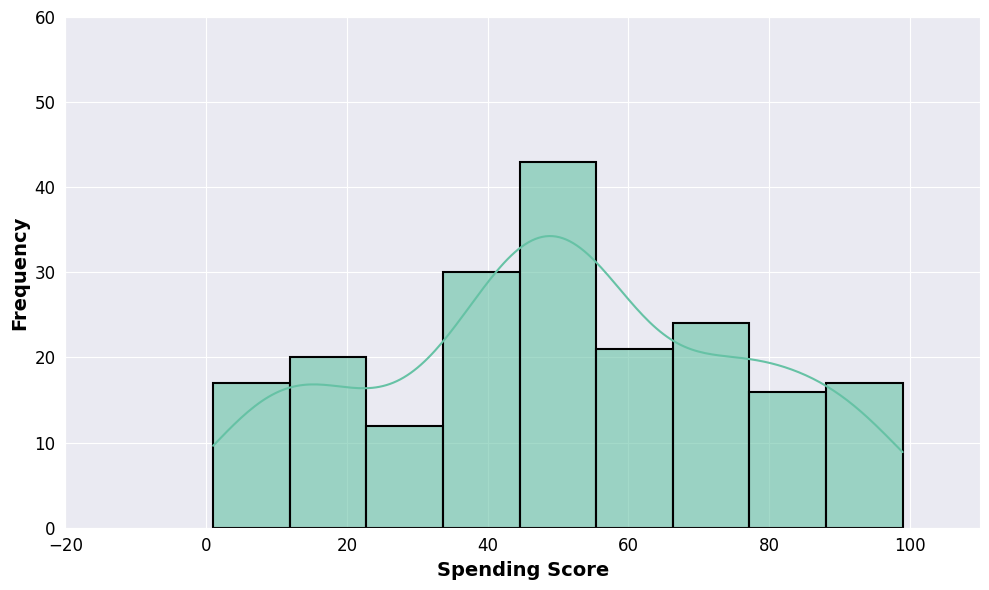

In [12]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))

sns.histplot(train_data['Spending Score (1-100)'], kde=True, alpha=0.6, linewidth=1.5, edgecolor='black')

plt.xlabel('Spending Score', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')

plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.xlim(-20, 110)
plt.ylim(0, 60)
plt.tight_layout()
plt.show()

# **Pre-processing**

In [13]:
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data)

# **K-means**
Searching for the best number of clusters, I will run k=3, k=4... to k = 21 and compare the results using SSE, WCSS and DB.

1. Sum of Squared Errors (SSE): represents the sum of the squared distances between each data point and its assigned cluster centroid

2. Within-Cluster Sum of Squares (WCSS): represents the sum of squared distances of each data point within its assigned cluster

3. Davies Bouldin (DB): a measure of uniqueness of the clusters and takes into consideration both cohesiveness of the cluster (distance between the data points and center of the cluster) and separation between the clusters.

In [15]:
# Initialize K-Means with different parameter values for k=3 to k=20
kmeans_params = [{'n_clusters': k, 'random_state': 42} for k in range(3, 21)]

# Perform K-Means clustering with different parameter values
kmeans_results = []
for params in kmeans_params:
    kmeans = KMeans(**params)
    train_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
    kmeans_results.append(train_data['KMeans_Cluster'].value_counts())

# Print and visualize the results
for i, result in enumerate(kmeans_results):
    print(f"K-Means Clustering Result {i+1}:\n{result}\n")

K-Means Clustering Result 1:
KMeans_Cluster
0    85
1    66
2    49
Name: count, dtype: int64

K-Means Clustering Result 2:
KMeans_Cluster
1    57
2    55
0    48
3    40
Name: count, dtype: int64

K-Means Clustering Result 3:
KMeans_Cluster
0    55
2    43
1    40
3    31
4    31
Name: count, dtype: int64

K-Means Clustering Result 4:
KMeans_Cluster
3    41
4    38
1    37
2    35
0    26
5    23
Name: count, dtype: int64

K-Means Clustering Result 5:
KMeans_Cluster
6    40
2    37
0    33
4    26
3    24
1    22
5    18
Name: count, dtype: int64

K-Means Clustering Result 6:
KMeans_Cluster
5    36
6    34
0    27
2    24
1    22
3    20
4    19
7    18
Name: count, dtype: int64

K-Means Clustering Result 7:
KMeans_Cluster
5    33
1    30
2    26
4    25
8    21
6    19
7    18
0    15
3    13
Name: count, dtype: int64

K-Means Clustering Result 8:
KMeans_Cluster
2    26
3    26
7    24
4    24
1    21
0    19
6    18
9    14
5    14
8    14
Name: count, dtype: int64

K-Means Clusteri

# **Evaluation**

In [16]:
import plotly.graph_objs as go
import plotly.subplots as ps
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist

k_values = list(range(1, 21))  # Convert range to list

# Initialize empty lists to store WCSS, SSE, and DB index values for each k
wcss_values = []
sse_values = []
db_values = []

# Iterate over each k value and perform K-Means clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    labels = kmeans.labels_

    # Calculate WCSS
    wcss_values.append(kmeans.inertia_)

    # Calculate SSE
    sse = sum(np.min(cdist(train_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / train_data.shape[0]
    sse_values.append(sse)

    # Check if there are at least two unique labels for DB index calculation
    if len(set(labels)) < 2:
        print(f"Skipping k={k} due to insufficient unique labels.")
        continue

    # Calculate DB index
    db_index = davies_bouldin_score(train_data, labels)
    db_values.append(db_index)

# Create three 3D scatter plots
fig = ps.make_subplots(rows=3, cols=1, subplot_titles=("WCSS", "SSE", "DB Index"))

# Add traces for WCSS, SSE, and DB index
fig.add_trace(go.Scatter(x=k_values, y=wcss_values, mode='lines+markers', name='WCSS'), row=1, col=1)
fig.add_trace(go.Scatter(x=k_values, y=sse_values, mode='lines+markers', name='SSE'), row=2, col=1)
fig.add_trace(go.Scatter(x=k_values[:len(db_values)], y=db_values, mode='lines+markers', name='DB Index'), row=3, col=1)

# Update layout
fig.update_layout(height=1300, width=1200, title_text="Elbow Plots for K-Means Clustering",
                  scene=dict(xaxis_title='Number of Clusters (k)', yaxis_title='Metric Value', zaxis_title='Metric Value'))

# Show the plot
fig.show()

Skipping k=1 due to insufficient unique labels.


# **K-Means Clustering with k= 7, 3D scatterplot**

In [17]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans

def kmeans_plotter(train_data, k=7):
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)

    # Add cluster labels to the dataframe
    train_data['label'] = kmeans.labels_

    # Create a 3D scatter plot with the clustered data
    fig = px.scatter_3d(train_data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='label',
                         symbol='label', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'},
                         opacity=0.7, width=900, height=850,
                         title=f'K-Means Clustering with k={k}',
                         labels={'label': 'Cluster'},
                         color_discrete_map={})  # Remove color legend

    fig.update_layout(showlegend=False)  # Remove color legend
    return fig

# Assuming 'train_data' is your DataFrame containing the data

# Call the function to create the K-Means clustering plot
fig = kmeans_plotter(train_data)
fig.show()